# Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [1]:
# Para visualização de gráficos
from pylab import *
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import statsmodels as st
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

# Linear Regression Models

In [12]:
# Criando dados artificiais
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [13]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [14]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.055e+06
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          1.87e-239
Time:                        17:32:26   Log-Likelihood:                -146.08
No. Observations:                 100   AIC:                             298.2
Df Residuals:                      97   BIC:                             306.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1820      0.311      3.796      0.0

In [7]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.1875799   0.06751355 10.00087227]
R2:  0.9999904584846492


In [8]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     232.2
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           8.80e-28
Time:                        17:14:54   Log-Likelihood:                -34.271
No. Observations:                  50   AIC:                             76.54
Df Residuals:                      46   BIC:                             84.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5233      0.026     19.886      0.0

In [9]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.52334809  0.37447144 -0.0223435   4.91092107]
Standard errors:  [0.02631805 0.10345934 0.00231074 0.17064722]
Predicted values:  [ 4.35233362  4.80205743  5.21991591  5.5855007   5.8857687   6.11718504
  6.28630383  6.40869134  6.5063685   6.60419295  6.72577498  6.88959841
  7.1059838   7.37539275  7.68835211  8.02701036  8.36807059  8.6866181
  8.96021381  9.17258095  9.31627929  9.39392752  9.41777306  9.40767978
  9.38786447  9.38291808  9.41376548  9.49422757  9.62875055  9.81167543
 10.02816778 10.25665496 10.47237048 10.65142305 10.77472185 10.83111309
 10.81921257 10.74763307 10.63356931 10.49997292 10.37178152 10.27182158
 10.21705804 10.21580708 10.26636975 10.35731113 10.46933904 10.57847369
 10.6599875  10.69246777]


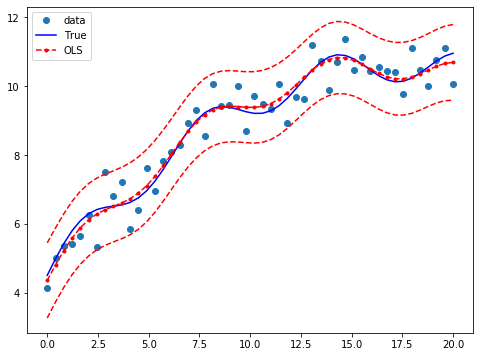

In [10]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

# Time-Series Analysis

In [15]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [16]:
# Gerando dados
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [17]:
# Parâmetros
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [18]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

C:\Users\paloma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [19]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -245.887
Method:                       css-mle   S.D. of innovations              0.645
Date:                Tue, 03 Nov 2020   AIC                            501.773
Time:                        17:34:39   BIC                            519.381
Sample:                    01-31-1980   HQIC                           508.860
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8411      0.403      2.089      0.037       0.052       1.630
ar.L2.y       -0.2693      0.247     -1.092      0.275      -0.753       0.214
ma.L1.y        0.5352      0.412      1.299      0.1

End